In [1]:
from fsdetection import load_fs_dataset
import numpy as np

/home/hicham/miniconda3/envs/phd/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_fs_dataset("HichTala/fashionpedia")

In [4]:
def clean_utf8(example):
    for k, v in example.items():
        if isinstance(v, str):
            example[k] = v.encode("utf-8", "ignore").decode("utf-8")
    return example

In [11]:
def find_bad_rows(dataset):
    bad = []
    for i, row in enumerate(dataset):
        for k, v in row.items():
            if isinstance(v, str):
                try:
                    v.encode("utf-8")
                except UnicodeEncodeError:
                    bad.append((i, k, repr(v[:200])))
    return bad

bad_rows = find_bad_rows(dataset["train"])
bad_rows[:5]

[]

In [14]:
import unicodedata

def cleanse_string(string):
    try:
        # Normalize the string to clean malformed sequences
        return unicodedata.normalize("NFKD", string)
    except TypeError:
        return string  # Return as-is if it's not a string

# Apply cleansing to the dataset
dataset = dataset.map(
    lambda row: {k: cleanse_string(v) if isinstance(v, str) else v for k, v in row.items()}
)

Map: 100%|██████████| 6854/6854 [00:19<00:00, 346.08 examples/s]


In [16]:
def safe_utf8_encode(row):
    try:
        # Encode string fields to UTF-8 to catch issues early
        row = {k: v.encode("utf-8") if isinstance(v, str) else v for k, v in row.items()}
        return row
    except UnicodeEncodeError as e:
        print(f"Problematic row skipped: {row}, Error: {e}")
        return None  # Drop problematic rows

# Apply safe encode check
dataset = dataset.filter(lambda x: safe_utf8_encode(x) is not None)

Filter: 100%|██████████| 6854/6854 [00:06<00:00, 1082.39 examples/s]


In [5]:
dataset["train"] = dataset["train"].map(clean_utf8)

Map: 100%|██████████| 54087/54087 [02:40<00:00, 337.99 examples/s]


In [17]:
dataset["test"].to_json("annotations.json")

Creating json from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]


OverflowError: Overlong 3 byte UTF-8 sequence detected when encoding string

In [3]:
dataset["train"].sampling(shots=1, seed=int("9"))

In [4]:
len(dataset["train"])

46

In [41]:
len(dataset["train"].features["objects"]["category"].feature.names)

60

In [32]:
np.array(dataset["train"][0]["image"]).shape

(512, 512, 3)

In [18]:
classes = dataset["train"].features["objects"]["category"].feature.names

In [20]:
id2label = dict(enumerate(classes))

In [22]:
categories = [{"id": i, "name": name} for i, name in id2label.items()]

In [23]:
categories

[{'id': 0, 'name': 'plane'},
 {'id': 1, 'name': 'ship'},
 {'id': 2, 'name': 'storage-tank'},
 {'id': 3, 'name': 'baseball-diamond'},
 {'id': 4, 'name': 'tennis-court'},
 {'id': 5, 'name': 'basketball-court'},
 {'id': 6, 'name': 'ground-track-field'},
 {'id': 7, 'name': 'harbor'},
 {'id': 8, 'name': 'bridge'},
 {'id': 9, 'name': 'small-vehicle'},
 {'id': 10, 'name': 'large-vehicle'},
 {'id': 11, 'name': 'roundabout'},
 {'id': 12, 'name': 'swimming-pool'},
 {'id': 13, 'name': 'helicopter'},
 {'id': 14, 'name': 'soccer-ball-field'},
 {'id': 15, 'name': 'container-crane'}]

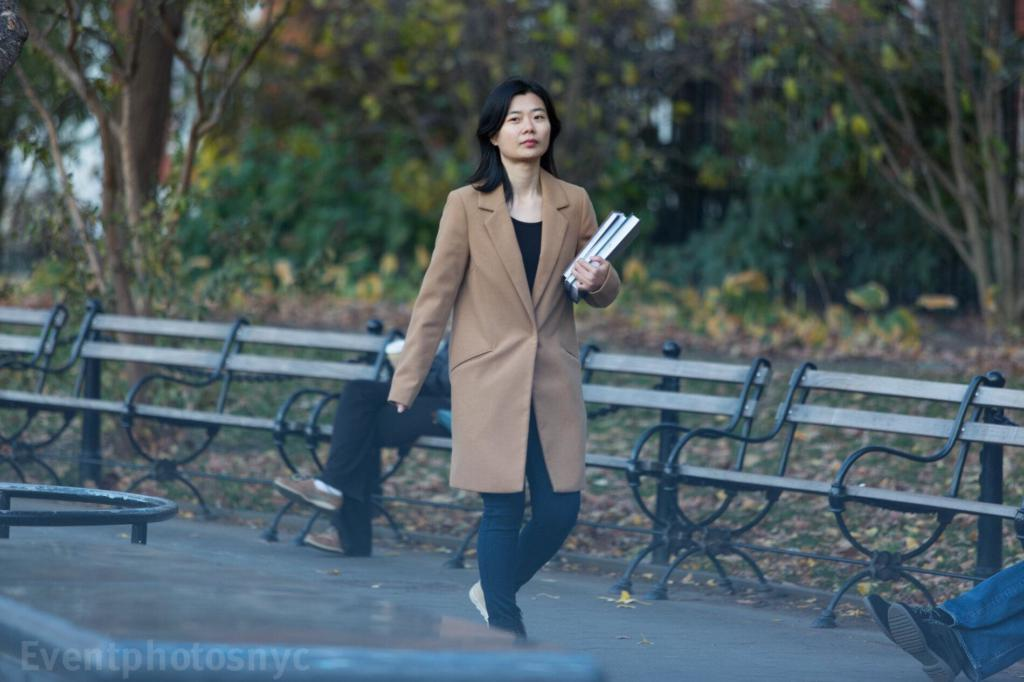

In [9]:
dataset["train"][4]["image"]